# Week 4 Exercise with Numpy

Use only numpy in these exercises
#### Exercise 1
1. Open the file './befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015



In [31]:
#exercise 1_init

import numpy as np

# 1. + 2.
stats =np.genfromtxt('./befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)

# 3.
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
print("year", "citypart", "age", "countrycode", "amount")
print(stats)
print(neighb)

year citypart age countrycode amount
[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]
{1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 10: 'Amager Vest', 99: 'Udenfor'}


In [84]:
# 3. Find out how many people lived in each of the 11 areas in 2015

def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = stats[mask & (stats[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

mask = (stats[:,0] == 2015)
#print(stats[mask])

people_dict = { v:number_of_people_per_neighbourhood(k, mask) for (k,v) in neighb.items()}
print(people_dict)

{'Indre By': 51937, 'Østerbro': 75113, 'Nørrebro': 78802, 'Vesterbro/Kgs. Enghave': 61623, 'Valby': 51727, 'Vanløse': 39537, 'Brønshøj-Husum': 43908, 'Bispebjerg': 53604, 'Amager Øst': 55205, 'Amager Vest': 64967, 'Udenfor': 3872}


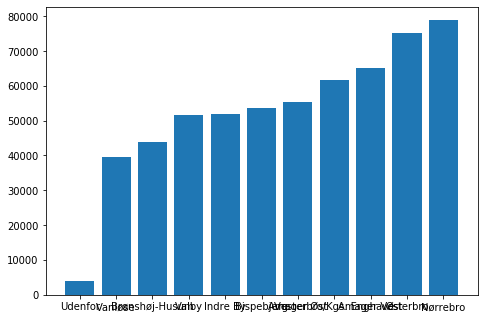

In [86]:
# 4. Make a bar plot to show the size of each city area from the smallest to the largest

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

sorted_people_list = sorted(people_dict.items(), key=lambda item: item[1])

sorted_areas= [area[0] for area in sorted_people_list]
sorted_numbers= [area[1] for area in sorted_people_list]

plt.bar(sorted_areas, sorted_numbers)
plt.show()

In [103]:
# 5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
def number_of_people(mask):
    all_people_in_given_mask = stats[mask]
    sum_of_people = all_people_in_given_mask[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

mask = ((stats[:,2] > 65) & (stats[:,0] == 2015))

peoples_above_65 = number_of_people(mask)
print("Sum of people above 65: ", peoples_above_65)

Sum of people above 65:  55750


In [109]:
# 6. How many of those were from the other nordic countries (not dk)
#Finland(5104), Iceland(5105), Norway(5110), Sweden(5120)

def mask_factory(state):
    return (
    (stats[:,2] > 65) & 
    (stats[:,0] == 2015) & 
    (stats[:,3] == state)
)

sweden = number_of_people(mask_factory(5120))
print("sweden", sweden)
finland = number_of_people(mask_factory(5104))
print("finland", finland)
norway = number_of_people(mask_factory(5110))
print("norway", norway)
iceland = number_of_people(mask_factory(5105))
print("iceland", iceland)

print("Sum of people above 65 from other nordic countries: ", sweden+ finland+norway+iceland)

sweden 267
finland 72
norway 236
iceland 2
Sum of people above 65 from other nordic countries:  577


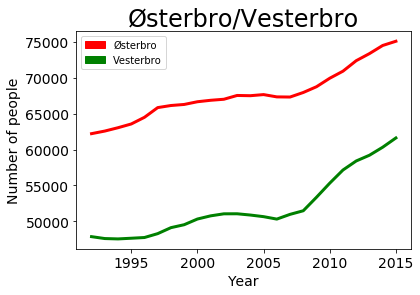

In [128]:
# 7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

osterbro = [] # 'Østerbro': 2
vesterbro = [] # 'Vesterbro/Kgs. Enghave': 4

for year in range(1992, 2016):
    mask = (stats[:,0] == year)
    osterbro.append(number_of_people_per_neighbourhood(2, mask))
    vesterbro.append(number_of_people_per_neighbourhood(4, mask))
               
#print("Østerbro", osterbro)
#print("Vesterbro",vesterbro)

plt.figure()
plt.plot(range(1992, 2016),osterbro,  linewidth=3, color='red')
plt.plot(range(1992, 2016),vesterbro,  linewidth=3, color='green')
# Set chart title and label axes. 
plt.title("Østerbro/Vesterbro", fontsize=24)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
# Set size of tick labels.
plt.tick_params(axis='both', labelsize=14)
red_patch = mpatches.Patch(color='red', label='Østerbro')
green_patch = mpatches.Patch(color='green', label='Vesterbro')
plt.legend(handles=[red_patch, green_patch])
plt.show()

#### Exercise 2  A bit harder (Extra only if you have the time)

1. From "Danmarks Statistik" download demographic data here:
'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1'
2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD
3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: BY_KODER_demographics.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 
6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020
